In [8]:
import numpy as np
from numpy.random import randn
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [9]:
dataset = randn(25)

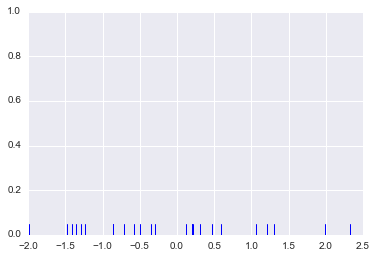

In [10]:
sns.rugplot(dataset)

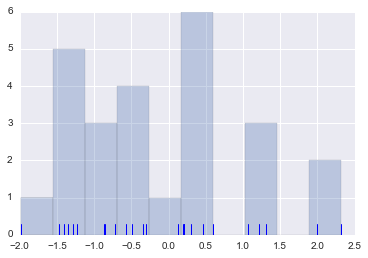

In [11]:
plt.hist(dataset, alpha=0.3)
sns.rugplot(dataset)

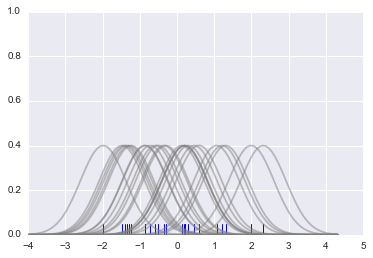

In [15]:
sns.rugplot(dataset)
x_min = dataset.min()-2
x_max = dataset.max() + 2
x_aixs = np.linspace(x_min, x_max, 100)
bandwidth =((4*dataset.std()**5)/(3*len(dataset)))**0.2
kernel_list = []
for data_point in dataset:
    kernel = stats.norm(data_point, bandwidth).pdf(x_aixs)
    kernel_list.append(kernel)
    kernel = kernel / kernel.max()
    kernel = kernel*0.4
    plt.plot(x_aixs, kernel, color = 'gray', alpha=0.5)
    plt.ylim(0,1)

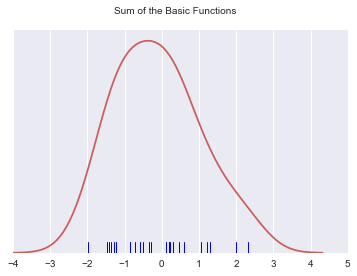

In [19]:
sum_of_kde = np.sum(kernel_list, axis=0)
fig = plt.plot(x_aixs, sum_of_kde, color='indianred')
sns.rugplot(dataset)
plt.yticks([])
plt.suptitle('Sum of the Basic Functions')

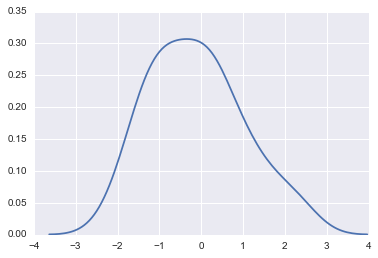

In [20]:
sns.kdeplot(dataset)

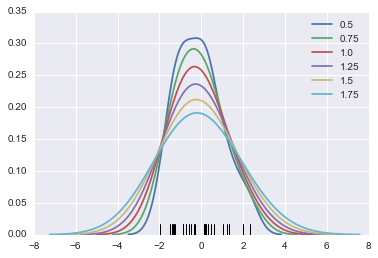

In [22]:
sns.rugplot(dataset, color="black")
for bw in np.arange(0.5, 2, 0.25):
    sns.kdeplot(dataset, bw=bw, label=bw)

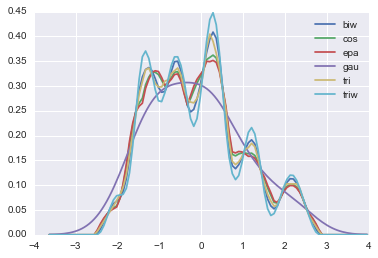

In [23]:
kernel_options = ['biw', 'cos', 'epa', 'gau', 'tri', 'triw']
for kern in kernel_options:
    sns.kdeplot(dataset, kernel=kern, label=kern)

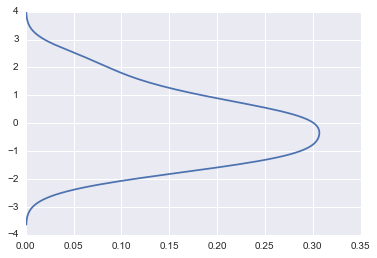

In [24]:
sns.kdeplot(dataset, vertical=True)


(array([  1.,   6.,   9.,  13.,  14.,  20.,  20.,  23.,  23.,  25.]),
 array([-1.98589603, -1.55531121, -1.12472638, -0.69414156, -0.26355673,
         0.16702809,  0.59761292,  1.02819774,  1.45878257,  1.88936739,
         2.31995222]),
 <a list of 10 Patch objects>)

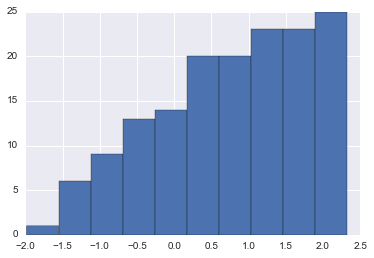

In [25]:
plt.hist(dataset, cumulative=True)

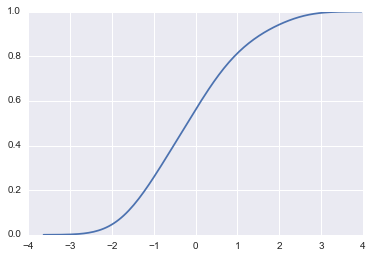

In [28]:
sns.kdeplot(dataset, cumulative=True)

In [31]:
mean=[0,0]
cov=[[1,0], [0,100]]
dataset2 = np.random.multivariate_normal(mean, cov, 1000)

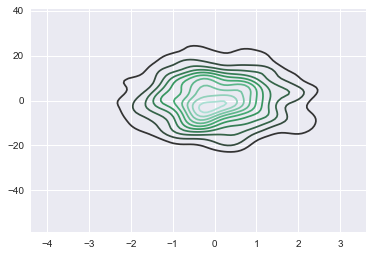

In [32]:
dframe = pd.DataFrame(dataset2, columns=['X', 'Y'])
sns.kdeplot(dframe)

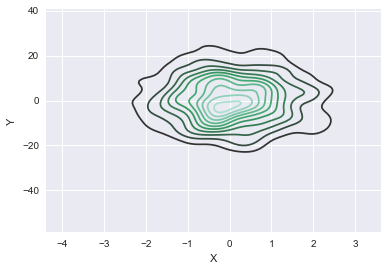

In [34]:
sns.kdeplot(dframe.X, dframe.Y)

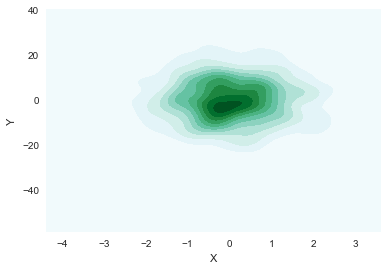

In [35]:
sns.kdeplot(dframe.X, dframe.Y, shade=True)

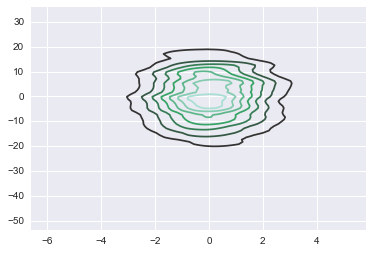

In [36]:
sns.kdeplot(dframe, bw=1)

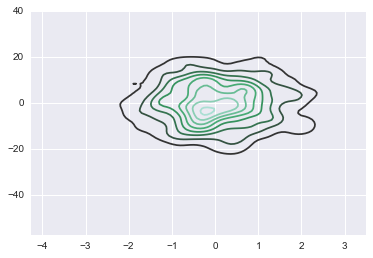

In [37]:
sns.kdeplot(dframe, bw='silverman')

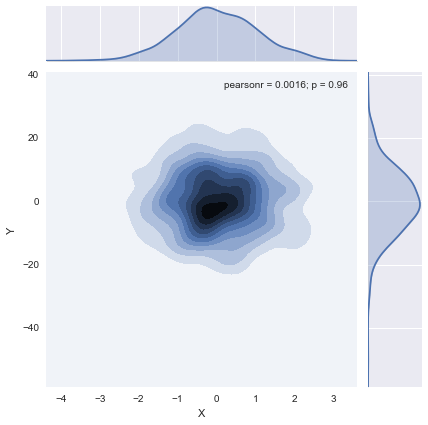

In [38]:
sns.jointplot('X', 'Y', dframe, kind='kde')